# Classificação

A documentação necessário das ferramentas usadas podem ser vistitadas em:

- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/tree.html#tree-classification)
- [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
- [SVM-SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [Train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)


## Importar conjunto de dados

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(suppress=True)


dataframe = pd.read_csv('https://raw.githubusercontent.com/sullyvan15/datasets/master/wine-type.csv', sep=';')

print(dataframe.shape)
print(dataframe.dtypes)
print(dataframe.describe())

(4898, 13)
Unnamed: 0                int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
type                     object
dtype: object
       Unnamed: 0  fixed acidity  volatile acidity  ...      pH  sulphates  alcohol
count     4898.00        4898.00           4898.00  ... 4898.00    4898.00  4898.00
mean      2448.50           6.85              0.28  ...    3.19       0.49    10.51
std       1414.08           0.84              0.10  ...    0.15       0.11     1.23
min          0.00           3.80              0.08  ...    2.72       0.22     8.00
25%       1224.25           6.30              0.21  ...    3.09       0.41     9.50
50%       2448.50           6.80              0.26  ...

In [ ]:
dataframe = dataframe.drop('Unnamed: 0', axis=1)

## Distribuição das classes

['b' 'a' 'c']
type
a    1060
b    3655
c     183
dtype: int64


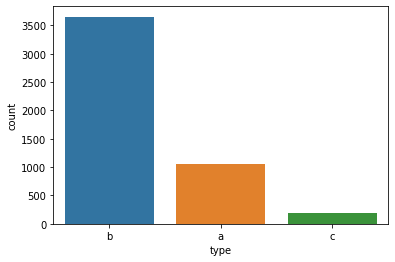

In [ ]:
import  matplotlib.pyplot as plt
import seaborn as sns

print(dataframe['type'].unique())
print(dataframe.groupby('type').size())

sns.countplot(dataframe['type'], label='Tipo')
plt.show()

## Distribuição dos atributos

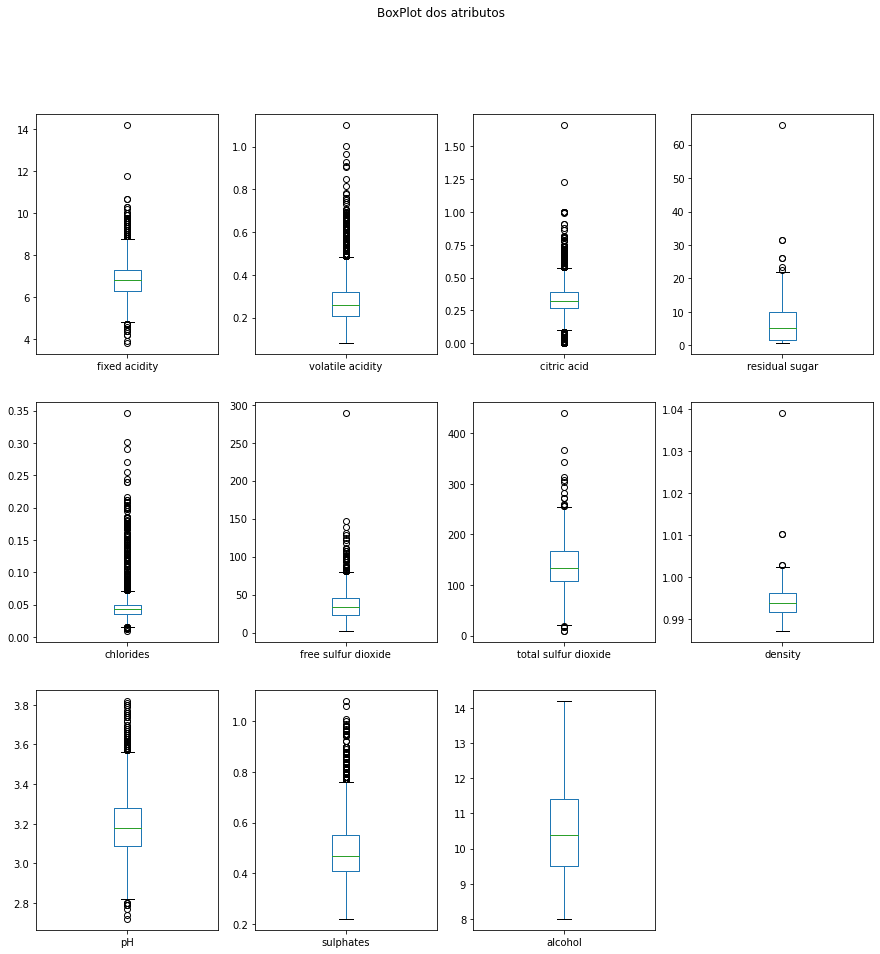

In [ ]:
dataframe.drop('type', axis=1).plot(kind='box', subplots=True, layout=(3,4),
                                       sharex=False, figsize=(15,15), title='BoxPlot dos atributos')
plt.show()

## Histograma dos atributos

Text(0.5, 0.98, 'Histograma para cada atributo de entrada')

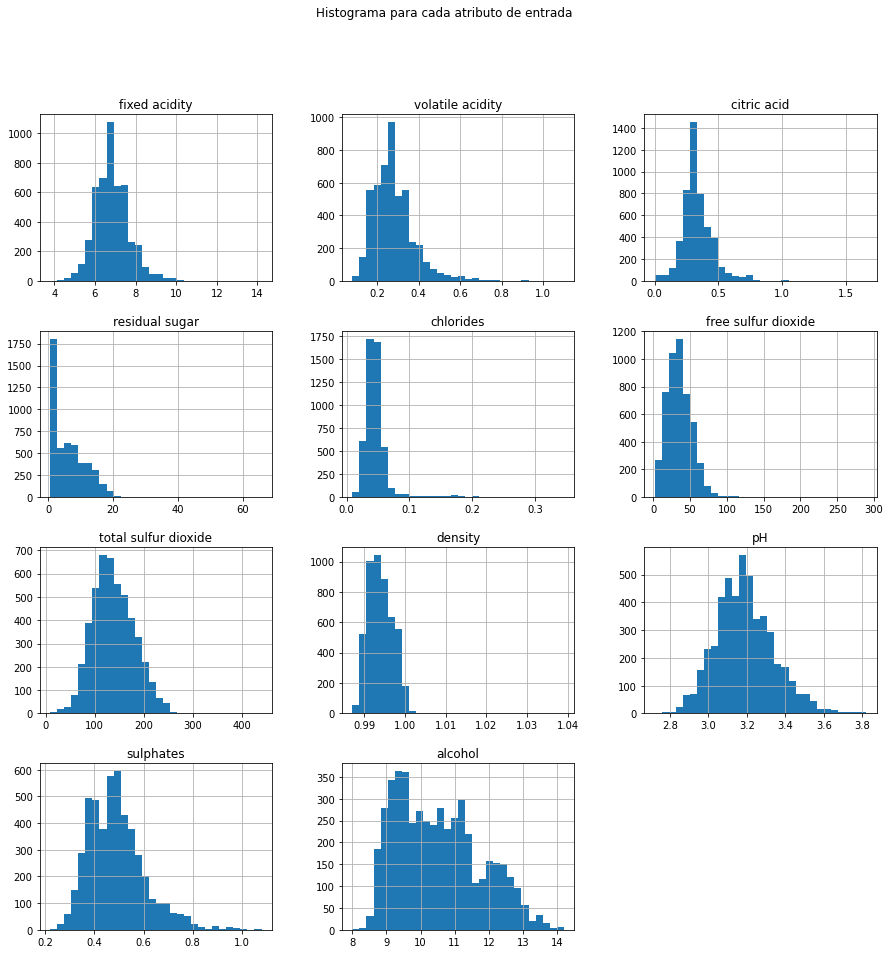

In [ ]:
import pylab as pl
dataframe.drop('type', axis=1).hist(bins=30, figsize=(15,15))
pl.suptitle("Histograma para cada atributo de entrada")

## Normalização dos dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler

y = dataframe['type']
X = dataframe.drop('type', axis=1)

scaler = MinMaxScaler(feature_range=(0, 1))

X = scaler.fit_transform(X)

## Data splicing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Treinando o algoritmo
### Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

print("Acuracia no conjunto de treino: ", clf_lr.score(X_train, y_train))
print("Acuracia no conjunto de teste: ", clf_lr.score(X_test, y_test))

Acuracia no conjunto de treino:  0.7737208743694451
Acuracia no conjunto de teste:  0.7510204081632653


### Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(X_train, y_train)

print("Acuracia no conjunto de treino: ", clf_dtc.score(X_train, y_train))
print("Acuracia no conjunto de teste: ", clf_dtc.score(X_test, y_test))

Acuracia no conjunto de treino:  1.0
Acuracia no conjunto de teste:  0.7795918367346939


### Floresta Aleátorias de Árvore de Decisão

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rfc = RandomForestClassifier()
clf_rfc.fit(X_train, y_train)

print("Acuracia no conjunto de treino: ", clf_rfc.score(X_train, y_train))
print("Acuracia no conjunto de teste: ", clf_rfc.score(X_test, y_test))

Acuracia no conjunto de treino:  1.0
Acuracia no conjunto de teste:  0.8761904761904762


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

print("Acuracia no conjunto de treino: ", clf_knn.score(X_train, y_train))
print("Acuracia no conjunto de teste: ", clf_knn.score(X_test, y_test))

Acuracia no conjunto de treino:  0.8556329570021619
Acuracia no conjunto de teste:  0.8081632653061225


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

print("Acuracia no conjunto de treino: ", clf_nb.score(X_train, y_train))
print("Acuracia no conjunto de teste: ", clf_nb.score(X_test, y_test))

Acuracia no conjunto de treino:  0.6807590679798222
Acuracia no conjunto de teste:  0.654421768707483


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

clf_svc = SVC()
clf_svc.fit(X_train, y_train)

print("Acuracia no conjunto de treino: ", clf_svc.score(X_train, y_train))
print("Acuracia no conjunto de teste: ", clf_svc.score(X_test, y_test))

Acuracia no conjunto de treino:  0.7859716550564497
Acuracia no conjunto de teste:  0.7768707482993197


## Avaliação do Modelo

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = clf_rfc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           a       0.88      0.70      0.78       174
           b       0.87      0.97      0.92       536
           c       1.00      0.08      0.15        25

    accuracy                           0.88       735
   macro avg       0.92      0.58      0.62       735
weighted avg       0.88      0.88      0.86       735



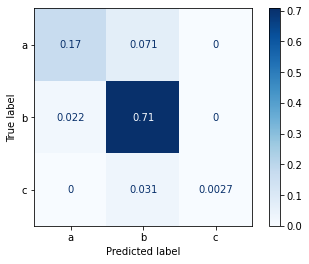

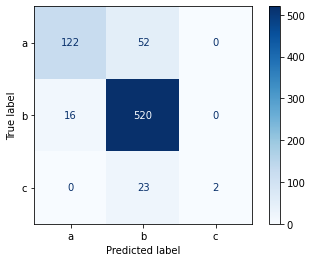

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_rfc, X_test, y_test, normalize='all', cmap=plt.cm.Blues)

plot_confusion_matrix(clf_rfc, X_test, y_test, normalize=None, cmap=plt.cm.Blues, values_format='d')